In [ ]:
#del df['column_name']

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [45]:
sns.set_style('white')

In [4]:
datadf = pd.read_csv("data/tips.csv", encoding="ISO-8859-1")

In [91]:
datadf

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True
...,...,...,...,...,...,...,...,...,...,...
38243,38244,605,Tipster E1,02/04/2016,Kempton,Solar Flair,Win,7.00,Lose,False
38244,38245,606,Tipster E1,02/04/2016,Doncaster,Express Himself,Each Way,12.00,Lose,False
38245,38246,607,Tipster E1,02/04/2016,Doncaster,Jack Dexter,Win,7.00,Lose,False
38246,38247,608,Tipster E1,02/04/2016,Kelso,Just Cameron,Win,4.33,Lose,False


In [5]:
#convert to date time 
datadf['Date'] = pd.to_datetime(datadf['Date'])

In [ ]:
#preserve each view of data
#plot date vs max and min
#plot date vs max - min, find trends
#[x] change date to datetime format? <<< "pandas datetime format" 
#take std dev of bets?
#remember this data is based on horses that tipsters is focused on

In [6]:
datesdf = datadf.sort_values(['Date']).reset_index()

In [19]:
print(type(datesdf['Date'][0]))
datesdf

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,index,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,20268,20269,43,Tipster T,2013-01-06,Epsom,Galileo Rock,Win,23.0,Lose,True
1,20267,20268,42,Tipster T,2013-01-06,Epsom,Captaine Dunne,Win,9.0,Lose,True
2,20266,20267,41,Tipster T,2013-01-06,Epsom,St Paul De Vence,Win,11.0,Lose,True
3,23412,23413,72,Tipster X,2013-01-12,Fairyhouse,Minella Foru,Win,6.5,Lose,True
4,23413,23414,73,Tipster X,2013-01-12,Leicester,Ironic,Win,9.0,Lose,True
...,...,...,...,...,...,...,...,...,...,...,...
38243,22228,22229,288,Tipster V,2016-12-08,Newmarket,Dubai Dynamo,Win,14.5,Lose,True
38244,15724,15725,1010,Tipster O,2016-12-08,Newbury,Mister Musicmaster,Win,17.0,Lose,True
38245,15725,15726,1011,Tipster O,2016-12-08,Nottingham,Roman Flight,Win,29.0,Lose,True
38246,15727,15728,1013,Tipster O,2016-12-08,Newmarket,Lunar Deity,Win,15.0,Lose,True


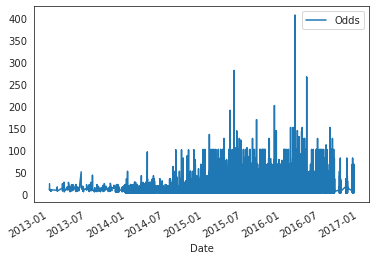

In [108]:
datesdf.plot(x='Date',y='Odds')

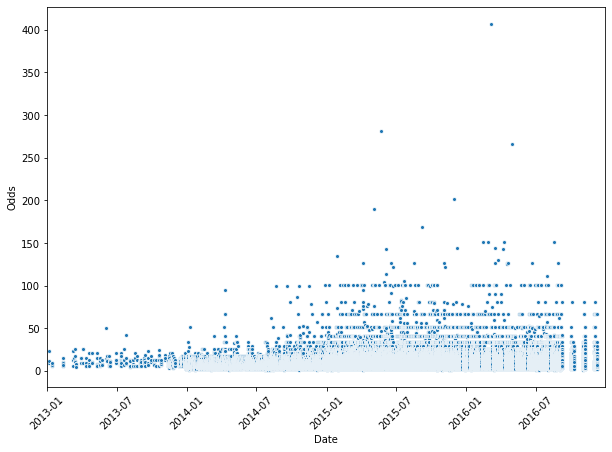

In [38]:
# datadf.plot(x='Date',y='Odds',kind='line')
x,y = datesdf['Date'],datesdf['Odds']
fig, ax = plt.subplots(figsize=(10,7))
ax.set(xlim=(pd.to_datetime('2013-01-01'),pd.to_datetime('2016-12-30')))
sns.scatterplot(x=x,y=y,s=15,ax=ax)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.show()

In [61]:
#what are those >100 Odds?!?!?

KeyError: 'mean'

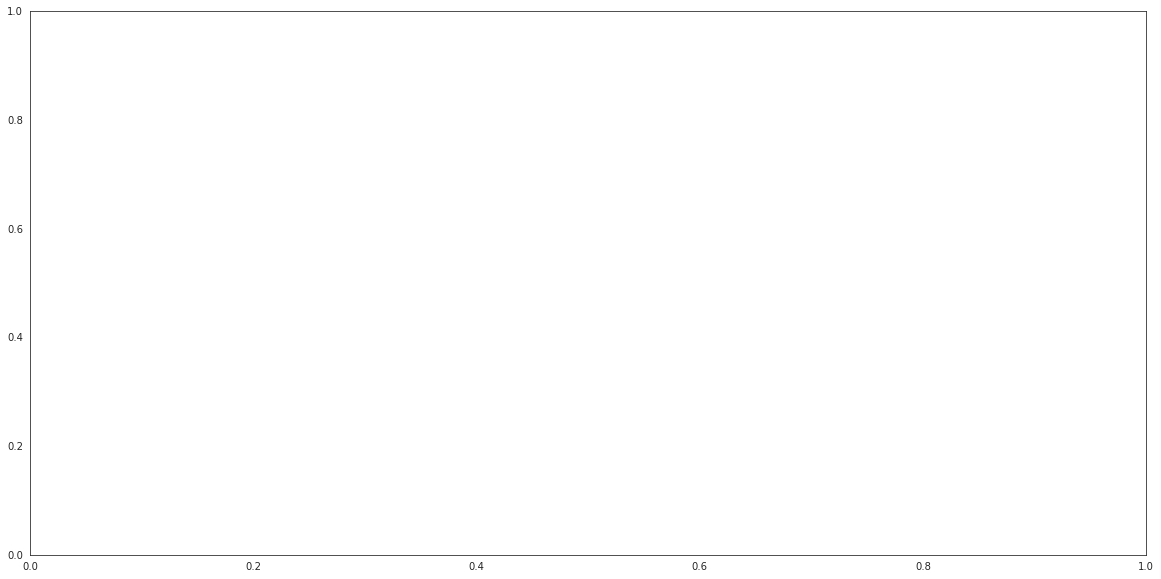

In [111]:
fig,axs = plt.subplots(figsize=(20,10))
axs.plot(datesdf['Date'][:300],datesdf['Odds']['mean'][:300],label='Average')
axs.plot(datesdf['Date'][:300],datesdf['Odds']['min'][:300],label='Min')
axs.set_title("Average Betting Odds by Day",fontsize=40)
axs.set_xlabel("Dates", fontsize=40)
axs.set_ylabel("Odds", fontsize=40)
axs.legend(loc='upper left',fontsize=30)
plt.setp(axs.get_xticklabels(), rotation='vertical', fontsize=14)
plt.setp(axs.get_yticklabels(), fontsize=24)
plt.show()

In [ ]:
#try grouping by months or year?
#too many dates, maybe slice a particular year or decade?
#y-axis is too stretched with max. Some people make crazy hail-mary bets.
#!!!!!Large betting odds outliers worth looking at: did they win? Did they use the tipster??


In [154]:
datesdf['delta'] = datesdf['Odds']['max']-datesdf['Odds']['min']
datesdf

Date       Odds              delta
                      mean   min   max       
0    2013-01-06  14.333333  9.00  23.0  14.00
1    2013-01-12   7.583333  6.00   9.0   3.00
2    2013-02-11  10.500000  8.00  15.0   7.00
3    2013-02-12   6.000000  5.50   6.5   1.00
4    2013-03-08  13.750000  6.00  23.0  17.00
...         ...        ...   ...   ...    ...
1050 2016-12-04   9.270000  2.63  34.0  31.37
1051 2016-12-05  13.885556  2.25  67.0  64.75
1052 2016-12-06  11.067500  2.20  67.0  64.80
1053 2016-12-07   8.365370  1.90  34.0  32.10
1054 2016-12-08  10.351719  2.50  67.0  64.50

[1055 rows x 5 columns]

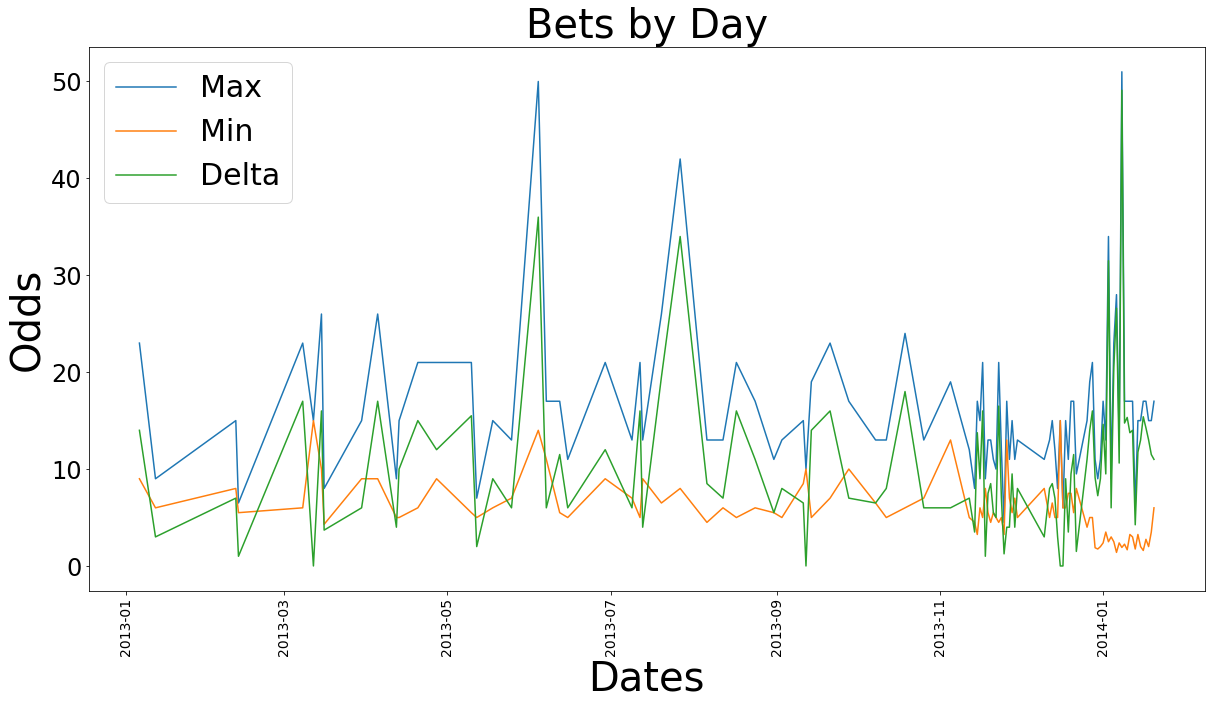

In [160]:
fig,axs = plt.subplots(figsize=(20,10))
axs.plot(datesdf['Date'][:100],datesdf['Odds']['max'][:100],label='Max')
axs.plot(datesdf['Date'][:100],datesdf['Odds']['min'][:100],label='Min')
axs.plot(datesdf['Date'][:100],datesdf['delta'][:100],label='Delta')
axs.set_title("Bets by Day",fontsize=40)
axs.set_xlabel("Dates", fontsize=40)
axs.set_ylabel("Odds", fontsize=40)
axs.legend(loc='upper left',fontsize=30)
plt.setp(axs.get_xticklabels(), rotation='vertical', fontsize=14)
plt.setp(axs.get_yticklabels(), fontsize=24)
plt.show()

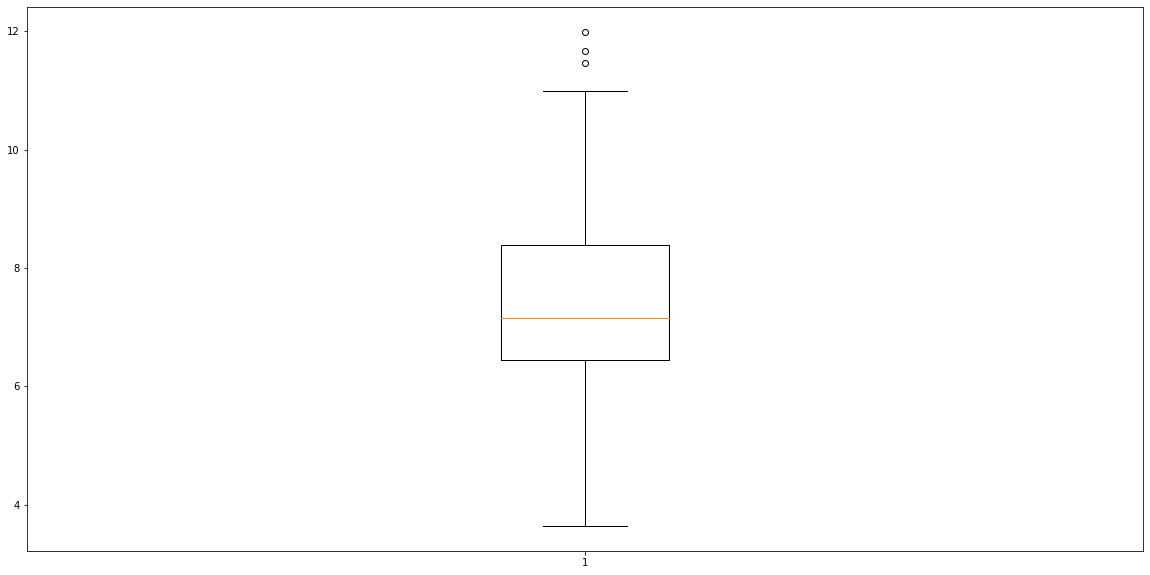

In [151]:
fig,axs = plt.subplots(figsize=(20,10))
axs.boxplot(datesdf['Odds']['mean'][200:300])
# axs.set_title("Bets by Day",fontsize=40)
# axs.set_xlabel("Dates", fontsize=40)
# axs.set_ylabel("Odds", fontsize=40)
# axs.legend(loc='upper left',fontsize=30)
# plt.setp(axs.get_xticklabels(), rotation='vertical', fontsize=14)
# plt.setp(axs.get_yticklabels(), fontsize=24)
plt.show()

In [ ]:
#Maybe group by year first then do a boxplot...
#check example for boxplot
#seaborn parallel boxplots
#remove outliers with percentile
#use log scale for y axis for outliers

In [161]:
datadf['Odds'].max()

407.0

In [175]:
datesdf1=datadf.groupby([(datadf.Date.dt.year).rename('Year'),(datadf.Date.dt.month).rename('Month')]).agg({'count'})
datesdf1

UID    ID Tipster  Date Track Horse Bet Type  Odds Result  \
           count count   count count count count    count count  count   
Year Month                                                               
2013 1         9     9       9     9     9     9        9     9      9   
     2         7     7       7     7     7     7        7     7      7   
     3        15    15      15    15    15    15       15    15     15   
     4        17    17      17    17    17    17       17    17     17   
     5        15    15      15    15    15    15       15    15     15   
     6        19    19      19    19    19    19       19    19     19   
     7        26    26      26    26    26    26       26    26     26   
     8        19    19      19    19    19    19       19    19     19   
     9        20    20      20    20    20    20       20    20     20   
     10       16    16      16    16    16    16       16    16     16   
     11       89    89      89    89    89    89       89    89     89   
     12      112   112     112   112   112   112      112   112    112   
2014 1       324   324     324   324   324   324      324   324    324   
     2       343   343     343   343   343   343      343   343    343   
     3       412   412     412   412   412   412      412   412    412   
     4       398   398     398   398   398   398      398   398    398   
     5       415   415     415   415   415   415      415   415    415   
     6       498   498     498   498   498   498      498   498    498   
     7       531   531     531   531   531   531      531   531    531   
     8       633   633     633   633   633   633      633   633    633   
     9       576   576     576   576   576   576      576   576    576   
     10      633   633     633   633   633   633      633   633    633   
     11      602   602     602   602   602   602      602   602    602   
     12      640   640     640   640   640   640      640   640    640   
2015 1      1251  1251    1251  1251  1251  1251     1251  1251   1251   
     2      1237  1237    1237  1237  1237  1237     1237  1237   1237   
     3      1531  1531    1531  1531  1531  1531     1531  1531   1531   
     4      1486  1486    1486  1486  1486  1486     1486  1486   1486   
     5      1558  1558    1558  1558  1558  1558     1558  1558   1558   
     6      1502  1502    1502  1502  1502  1502     1502  1502   1502   
     7      1594  1594    1594  1594  1594  1594     1594  1594   1594   
     8      1621  1621    1621  1621  1621  1621     1621  1621   1621   
     9      1712  1712    1712  1712  1712  1712     1712  1712   1712   
     10     1968  1968    1968  1968  1968  1968     1968  1968   1968   
     11     1659  1659    1659  1659  1659  1659     1659  1659   1659   
     12     1564  1564    1564  1564  1564  1564     1564  1564   1564   
2016 1      1455  1455    1455  1455  1455  1455     1455  1455   1455   
     2      1281  1281    1281  1281  1281  1281     1281  1281   1281   
     3      1350  1350    1350  1350  1350  1350     1350  1350   1350   
     4      1372  1372    1372  1372  1372  1372     1372  1372   1372   
     5      1288  1288    1288  1288  1288  1288     1288  1288   1288   
     6      1422  1422    1422  1422  1422  1422     1422  1422   1422   
     7      1816  1816    1816  1816  1816  1816     1816  1816   1816   
     8      1549  1549    1549  1549  1549  1549     1549  1549   1549   
     9       486   486     486   486   486   486      486   486    486   
     10      361   361     361   361   361   361      361   361    361   
     11      405   405     405   405   405   405      405   405    405   
     12      411   411     411   411   411   411      411   411    411   

           TipsterActive  
                   count  
Year Month                
2013 1                 9  
     2                 7  
     3                15  
     4                17  
     5                15  
     6                

In [19]:
datesdf=datadf.groupby([(datadf.Date.dt.year).rename('Year'),(datadf.Date.dt.month).rename('Month')]).agg({'Odds':['mean','min','max','std','var',]}).reset_index()
datesdf['Year-Month'] = datesdf['Year'].astype(str)+'-'+datesdf['Month'].astype(str)
datesdf

Year Month       Odds                                     Year-Month
                     mean   min    max        std         var           
0   2013     1   9.833333  6.00   23.0   5.172040   26.750000     2013-1
1   2013     2   8.571429  5.50   15.0   3.271449   10.702381     2013-2
2   2013     3  12.886667  4.30   26.0   5.979114   35.749810     2013-3
3   2013     4  11.970588  5.00   26.0   7.212122   52.014706     2013-4
4   2013     5   9.300000  5.00   21.0   4.685845   21.957143     2013-5
5   2013     6  13.710526  5.00   50.0   9.602251   92.203216     2013-6
6   2013     7  12.596154  5.00   42.0   7.561771   57.180385     2013-7
7   2013     8   9.657895  4.50   21.0   4.693532   22.029240     2013-8
8   2013     9  11.200000  5.00   23.0   4.794185   22.984211     2013-9
9   2013    10  10.975000  5.00   24.0   5.244362   27.503333    2013-10
10  2013    11   8.842697  3.25   21.0   3.725180   13.876963    2013-11
11  2013    12   9.077054  1.75   21.0   4.097865   16.792495    2013-12
12  2014     1   8.053673  1.10   51.0   5.461511   29.828101     2014-1
13  2014     2   7.087959  1.67   26.0   4.306610   18.546889     2014-2
14  2014     3   7.540850  1.44   41.0   5.035032   25.351549     2014-3
15  2014     4   8.330101  1.44   95.0   8.534055   72.830094     2014-4
16  2014     5   8.274843  1.67   41.0   5.552995   30.835750     2014-5
17  2014     6   8.080904  1.53   34.0   5.132338   26.340894     2014-6
18  2014     7   7.095424  1.40   34.0   4.790634   22.950171     2014-7
19  2014     8   8.802765  1.30  100.0   7.123428   50.743225     2014-8
20  2014     9   8.944323  1.40  100.0   7.930247   62.888824     2014-9
21  2014    10  10.341627  1.40  100.0   9.113881   83.062823    2014-10
22  2014    11   9.695914  1.84  100.0   9.123229   83.233313    2014-11
23  2014    12  10.183828  1.07  101.0   9.284101   86.194537    2014-12
24  2015     1  10.647074  1.22  135.0   9.379642   87.977680     2015-1
25  2015     2  10.533840  1.53  101.0  10.419328  108.562387     2015-2
26  2015     3  11.418752  1.50  101.0  10.792156  116.470633     2015-3
27  2015     4  11.695518  1.40  126.0  11.326934  128.299443     2015-4
28  2015     5  11.520655  1.50  281.0  12.883517  165.985013     2015-5
29  2015     6  11.935766  1.57  143.0  13.033355  169.868336     2015-6
30  2015     7  12.675245  1.66  105.0  13.240830  175.319578     2015-7
31  2015     8  11.547045  1.80  126.0  10.351374  107.150943     2015-8
32  2015     9  11.675234  1.53  169.0  10.681360  114.091442     2015-9
33  2015    10  12.382708  1.25  101.0  11.619748  135.018536    2015-10
34  2015    11  11.414599  1.36  201.0  11.541397  133.203855    2015-11
35  2015    12  10.306739  1.33  144.0   9.588612   91.941472    2015-12
36  2016     1  10.805546  1.36  101.0  10.180143  103.635311     2016-1
37  2016     2  10.939243  1.67  151.0  11.979598  143.510775     2016-2
38  2016     3  12.791289  1.40  407.0  16.531359  273.285828     2016-3
39  2016     4  11.366676  1.62  266.0  14.071518  198.007633     2016-4
40  2016     5  10.844868  1.80  101.0   9.415239   88.646723     2016-5
41  2016     6  11.092025  1.62  126.0  10.461636  109.445820     2016-6
42  2016     7  10.900909  1.22  111.0  10.497124  110.189604     2016-7
43  2016     8  11.473363  1.36  151.0  11.138704  124.070727     2016-8
44  2016     9  12.905638  1.44  101.0  13.134802  172.523014     2016-9
45  2016    10  10.110637  1.57   81.0   8.653992   74.891569    2016-10
46  2016    11  11.221580  1.44   81.0   9.794025   95.922926    2016-11
47  2016    12  11.590122  1.90   81.0  11.326034  128.279043    2016-12

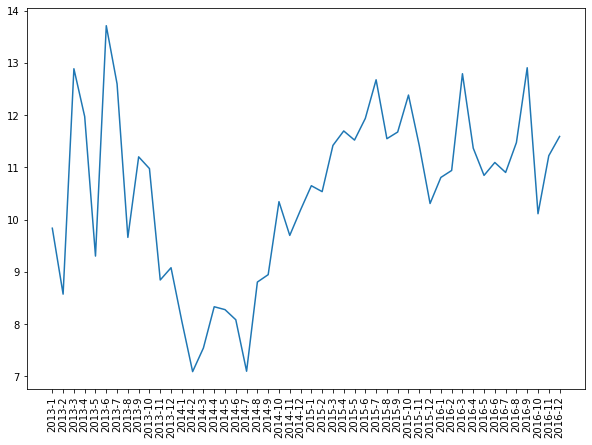

In [26]:
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(datesdf['Year-Month'], datesdf['Odds']['mean'])
plt.setp(ax.get_xticklabels(), rotation='vertical');
#[x] concat year and month column so the dates is yyyy-mm
#[x] somehow sort by date
#[x] plot dates vs data

In [179]:
datesdf.describe()

Odds                                              
            mean        min         max        std         var
count  48.000000  48.000000   48.000000  48.000000   48.000000
mean   10.517680   2.262708   96.395833   8.738963   86.434341
std     1.640208   1.481501   76.157100   3.206091   57.814143
min     7.087959   1.070000   15.000000   3.271449   10.702381
25%     9.244263   1.400000   34.000000   5.407224   29.246909
50%    10.872888   1.550000  100.000000   9.331872   87.086109
75%    11.557814   1.855000  126.000000  10.878793  118.370657
max    13.710526   6.000000  407.000000  16.531359  273.285828

In [251]:
dates_yeargroup = datadf.groupby([(datadf.Date.dt.year).rename('Year')]).agg({'Odds':['mean','min','max','std','var','median']}).reset_index()
dates_yeargroup

Year       Odds                                           
              mean   min    max        std         var median
0  2013  10.053654  1.75   50.0   5.313310   28.231265    9.0
1  2014   8.711692  1.07  101.0   7.370690   54.327065    7.0
2  2015  11.530484  1.22  281.0  11.364791  129.158467    8.0
3  2016  11.301778  1.22  407.0  11.822082  139.761619    8.0

In [ ]:
#how to filter out the outliers (high stakes betters in 2015 and 2016?)
#how to agg 25% and 75%?

In [227]:
type(datesdf.iloc[(0,0)])

numpy.int64

In [29]:
mean13=datesdf[datesdf['Year']==2013]

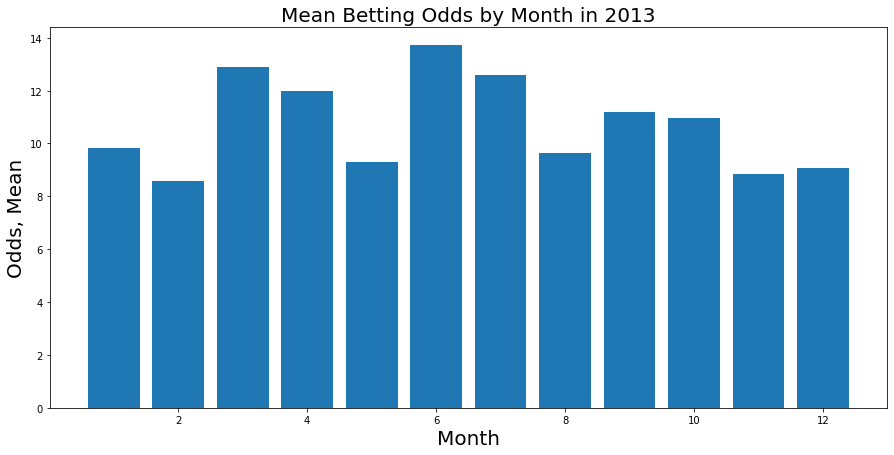

In [31]:
fig,axs = plt.subplots(figsize=(15,7))
axs.bar(x = mean13['Month'],height = mean13['Odds']['mean'])
axs.set_title("Mean Betting Odds by Month in 2013",fontsize=20)
axs.set_xlabel("Month", fontsize=20)
# axs.set_ylim((0,100))
# axs.legend(loc='upper left',fontsize=30)
# plt.setp(axs.get_xticklabels(), rotation='vertical', fontsize=14)
# plt.setp(axs.get_yticklabels(), fontsize=24)
plt.show()

#is this even useful? 

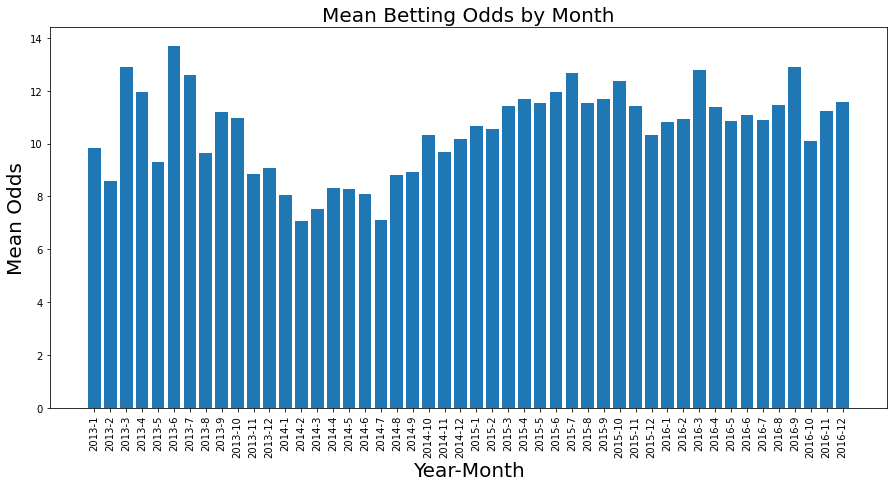

In [38]:
fig,axs = plt.subplots(figsize=(15,7))
axs.bar(x = datesdf['Year-Month'],height = datesdf['Odds']['mean'])
axs.set_title("Mean Betting Odds by Month",fontsize=20)
axs.set_xlabel("Year-Month", fontsize=20)
axs.set_ylabel("Mean Odds",fontsize=20)
# axs.set_ylim((0,100))
# axs.legend(loc='upper left',fontsize=30)
plt.setp(axs.get_xticklabels(), rotation='vertical')
# plt.setp(axs.get_yticklabels(), fontsize=24)
plt.show();

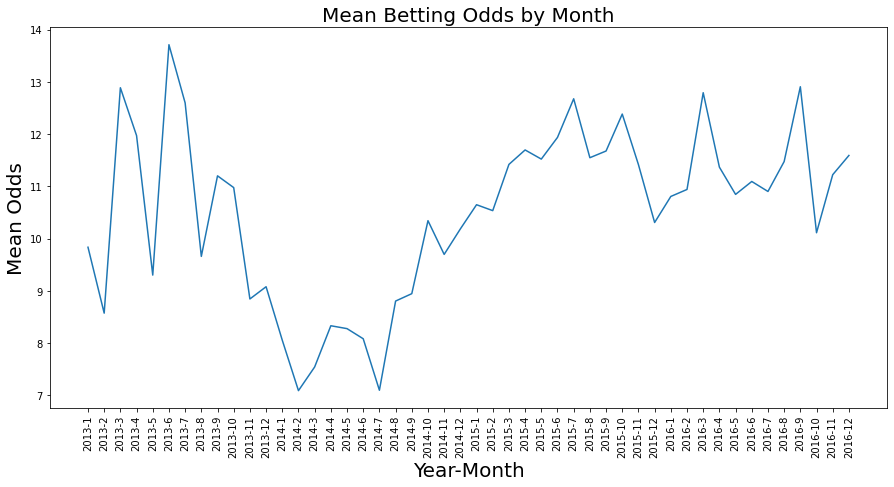

In [42]:
fig,axs = plt.subplots(figsize=(15,7))
axs.plot(datesdf['Year-Month'],datesdf['Odds']['mean'])
axs.set_title("Mean Betting Odds by Month",fontsize=20)
axs.set_xlabel("Year-Month", fontsize=20)
axs.set_ylabel("Mean Odds",fontsize=20)
# axs.set_ylim((0,100))
# axs.legend(loc='upper left',fontsize=30)
plt.setp(axs.get_xticklabels(), rotation='vertical')
# plt.setp(axs.get_yticklabels(), fontsize=24)
plt.show();

In [120]:
datadf.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,2015-07-25,Ascot,Peril,Win,4.33,Win,True


In [206]:
datadf['Year-Month']=(datadf.Date.dt.year).astype(str)+'-'+(datadf.Date.dt.month).astype(str)
datadf['Year']=datadf.Date.dt.year
datadf['Month']=datadf.Date.dt.month
# datadf1=datadf.sort_values('Year-Month').reset_index()

In [207]:
del datadf1['index']

In [208]:
datadf1.head(10)

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive,Year-Month,Year,Month
0,23418,77,Tipster X,2013-01-12,Carlisle,Danebrook Lad,Win,9.0,Lose,True,2013-1,2013,1
1,23416,75,Tipster X,2013-01-12,Leicester,Hot Whiskey,Win,6.0,Lose,True,2013-1,2013,1
2,20267,41,Tipster T,2013-01-06,Epsom,St Paul De Vence,Win,11.0,Lose,True,2013-1,2013,1
3,20268,42,Tipster T,2013-01-06,Epsom,Captaine Dunne,Win,9.0,Lose,True,2013-1,2013,1
4,20269,43,Tipster T,2013-01-06,Epsom,Galileo Rock,Win,23.0,Lose,True,2013-1,2013,1
5,23414,73,Tipster X,2013-01-12,Leicester,Ironic,Win,9.0,Lose,True,2013-1,2013,1
6,23415,74,Tipster X,2013-01-12,Carlisle,Fiddlers Reel,Win,8.0,Lose,True,2013-1,2013,1
7,23413,72,Tipster X,2013-01-12,Fairyhouse,Minella Foru,Win,6.5,Lose,True,2013-1,2013,1
8,23417,76,Tipster X,2013-01-12,Carlisle,Torrential Raine,Win,7.0,Lose,True,2013-1,2013,1
9,20347,121,Tipster T,2013-10-26,Aintree,Astracad,Win,7.5,Lose,True,2013-10,2013,10


In [230]:
tipsterdf = datadf.groupby(['Tipster','Result','Year-Month','Year','Month','TipsterActive']).agg({'Odds':['mean','std']}).reset_index()
tipsterdf = tipsterdf.sort_values(['Year','Month'])

In [232]:
tipsterdf.head(70)

Tipster Result Year-Month  Year Month TipsterActive       Odds  \
                                                                  mean   
1085  Tipster T   Lose     2013-1  2013     1          True  14.333333   
1258  Tipster X   Lose     2013-1  2013     1          True   7.583333   
1089  Tipster T   Lose     2013-2  2013     2          True  10.500000   
1262  Tipster X   Lose     2013-2  2013     2          True   6.000000   
1090  Tipster T   Lose     2013-3  2013     3          True  12.561538   
...         ...    ...        ...   ...   ...           ...        ...   
693   Tipster J    Win     2014-2  2014     2          True   8.000000   
1101  Tipster T   Lose     2014-2  2014     2          True   9.291667   
1145  Tipster T    Win     2014-2  2014     2          True  11.000000   
1273  Tipster X   Lose     2014-2  2014     2          True   8.527698   
1316  Tipster X    Win     2014-2  2014     2          True   9.493929   

                
           std  
1085  7.571878  
1258  1.281275  
1089  3.109126  
1262  0.500000  
1090  6.391340  
...        ...  
693   2.000000  
1101  3.257567  
1145  1.414214  
1273  3.586023  
1316  5.357939  

[70 rows x 8 columns]

In [201]:
tipA_wins['Month']=tipA_wins['Year-Month'].apply(lambda x: int(x.split('-')[-1]))

/home/zy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#need to convert "Results" to numerical pos or neg so I can quantify their performance...should do this in original dataframe

In [241]:
copydf = datadf.copy()
copydf.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive,Year-Month,Year,Month
0,1,1,Tipster A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True,2015-7,2015,7
1,2,2,Tipster A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True,2015-7,2015,7
2,3,3,Tipster A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True,2015-7,2015,7
3,4,4,Tipster A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True,2015-7,2015,7
4,5,5,Tipster A,2015-07-25,Ascot,Peril,Win,4.33,Win,True,2015-7,2015,7


In [244]:
copydf['Result_num'] = copydf['Result'].apply(lambda x: 1.0 if x=='Win' else -1.0)
copydf['Result_cost']= copydf['Result_num'] * copydf['Odds']

In [245]:
copydf

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive,Year-Month,Year,Month,Result_num,Result_cost
0,1,1,Tipster A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True,2015-7,2015,7,-1.0,-8.00
1,2,2,Tipster A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True,2015-7,2015,7,-1.0,-4.50
2,3,3,Tipster A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True,2015-7,2015,7,-1.0,-7.00
3,4,4,Tipster A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True,2015-7,2015,7,-1.0,-5.00
4,5,5,Tipster A,2015-07-25,Ascot,Peril,Win,4.33,Win,True,2015-7,2015,7,1.0,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38243,38244,605,Tipster E1,2016-02-04,Kempton,Solar Flair,Win,7.00,Lose,False,2016-2,2016,2,-1.0,-7.00
38244,38245,606,Tipster E1,2016-02-04,Doncaster,Express Himself,Each Way,12.00,Lose,False,2016-2,2016,2,-1.0,-12.00
38245,38246,607,Tipster E1,2016-02-04,Doncaster,Jack Dexter,Win,7.00,Lose,False,2016-2,2016,2,-1.0,-7.00
38246,38247,608,Tipster E1,2016-02-04,Kelso,Just Cameron,Win,4.33,Lose,False,2016-2,2016,2,-1.0,-4.33


In [350]:
datadf['Result_num'] = datadf['Result'].apply(lambda x: 1.0 if x=='Win' else -1.0)
datadf['Result_cost']= datadf['Result_num'] * datadf['Odds']
datadf['Result_cost']= datadf['Result_cost'].apply(lambda x: x-1.0 if x > 0 else -1.0)

In [343]:
datadf

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive,Year-Month,Year,Month,Result_num,Result_cost
0,1,1,Tipster A,2015-07-24,Ascot,Fredricka,Win,8.00,Lose,True,2015-7,2015,7,-1.0,-1.00
1,2,2,Tipster A,2015-07-24,Thirsk,Spend A Penny,Win,4.50,Lose,True,2015-7,2015,7,-1.0,-1.00
2,3,3,Tipster A,2015-07-24,York,Straightothepoint,Win,7.00,Lose,True,2015-7,2015,7,-1.0,-1.00
3,4,4,Tipster A,2015-07-24,Newmarket,Miss Inga Sock,Win,5.00,Lose,True,2015-7,2015,7,-1.0,-1.00
4,5,5,Tipster A,2015-07-25,Ascot,Peril,Win,4.33,Win,True,2015-7,2015,7,1.0,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38243,38244,605,Tipster E1,2016-02-04,Kempton,Solar Flair,Win,7.00,Lose,False,2016-2,2016,2,-1.0,-1.00
38244,38245,606,Tipster E1,2016-02-04,Doncaster,Express Himself,Each Way,12.00,Lose,False,2016-2,2016,2,-1.0,-1.00
38245,38246,607,Tipster E1,2016-02-04,Doncaster,Jack Dexter,Win,7.00,Lose,False,2016-2,2016,2,-1.0,-1.00
38246,38247,608,Tipster E1,2016-02-04,Kelso,Just Cameron,Win,4.33,Lose,False,2016-2,2016,2,-1.0,-1.00


In [370]:
datadf['Result_cost'].max()

100.0

In [364]:
tipstersummary = datadf.groupby(['Tipster','TipsterActive']).agg({'Result_cost':['mean','sum','count','max']})
tipstersummary

Result_cost                      
                                mean      sum count    max
Tipster    TipsterActive                                  
Tipster A  True             1.490541  1983.91  1331   50.0
Tipster A1 True             0.443590  1085.02  2446  100.0
Tipster B  True             0.556004   279.67   503   66.0
Tipster B1 False            0.075194   187.76  2497   25.0
Tipster C  False            2.252284  3914.47  1738  100.0
Tipster C1 False            0.542655   271.87   501   33.0
Tipster D  True             1.031714   764.50   741   50.0
Tipster D1 True             2.135861  4525.89  2119  100.0
Tipster E  True             0.088957   329.14  3700   14.0
Tipster E1 False            1.063153   647.46   609   28.0
Tipster F  False            1.621575   236.75   146   33.0
Tipster G  True             3.674138  1065.50   290   66.0
Tipster H  False            0.204298   170.18   833   33.0
Tipster I  True             0.947837   429.37   453   66.0
Tipster J  True             0.812189  1573.21  1937   66.0
Tipster K  True             0.401463    98.76   246   16.0
Tipster L  False            0.251011   357.69  1425   25.0
Tipster M  True             1.372727  1313.70   957   50.0
Tipster N  False            1.429855   593.39   415   33.0
Tipster O  True             0.298218   326.25  1094   43.0
Tipster P  True             0.203873   118.45   581   10.5
Tipster Q  False            0.298492   463.26  1552   33.0
Tipster R  True             0.510431   970.33  1901   33.0
Tipster S  True             0.821854   314.77   383   33.0
Tipster T  True             0.143453   191.08  1332   66.0
Tipster U  True             1.100627   421.54   383   25.0
Tipster V  True             0.028695    11.65   406   25.0
Tipster W  False            0.400533   398.13   994  100.0
Tipster X  True             0.374606  1641.90  4383   33.0
Tipster Y  False            0.534214   784.76  1469   25.0
Tipster Z  False            0.793069   700.28   883   33.0

In [398]:
#bootstrap function
def bootstrap(x):
    """Draw bootstrap resamples from the array x.

    Parameters
    ----------
    x: np.array, shape (n, )
      The data to draw the bootstrap samples from.
    
    resamples: int
      The number of bootstrap samples to draw from x.
    
    Returns
    -------
    bootstrap_samples: np.array, shape (resamples, n)
      The bootstrap resamples from x.
    """
#     bs_sample = np.array([])
#     for i in range(x.size):
#         sample = np.random.choice(x, size=resamples, replace = True)
#         bs_sample = np.append(bs_sample,sample)
#     return bs_sample, bs_sample.shape
    bs_sample=[]
    samplesize = len(x)
    for i in range(samplesize):
        sample = np.random.choice(x, size=x.shape[0], replace = True)
        bs_sample.append(sample)
    bs_sample_arr = np.array(bs_sample)
    
    return bs_sample_arr

In [409]:
#Create Tipster X's list for bootstrapping
xrc=datadf[datadf['Tipster']=='Tipster X']['Result_cost']
bootstrap(xrc)

array([[-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , 10. , -1. , ..., 14. , -1. , -1. ],
       [-1. , -1. ,  7. , ..., -1. , -1. , -1. ],
       ...,
       [ 4.5, -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ],
       [-1. , -1. , -1. , ..., -1. , -1. , -1. ]])

In [403]:
def bootstrap_ci(sample, stat_function=np.mean, resamples=1000, ci=95):
    bs_sample = bootstrap(sample)
    
    func_arr = stat_function(bs_sample,axis=1)
    lower = (100. - ci)/2
    high = 100. - lower
    left_endpoint = np.percentile(func_arr, lower)
    right_endpoint = np.percentile(func_arr, ci)
    
    print("Sample {}th Percentile: {:2.2f}".format(ci,np.percentile(sample, ci)))
    print("Bootstrap Confidence Interval for Population {}'th Percentile: [{:2.2f}, {:2.2f}]".format(ci,
    left_endpoint, right_endpoint))
    
    plotdata = func_arr
    plt.hist(plotdata, bins=10)
    return left_endpoint, right_endpoint

In [ ]:
bootstrap_ci(xrc, stat_function=np.sum, ci=97.5)

In [1]:

for tipster in datadf['Tipster'].unique():
    print(tipster)
    print(datadf[datadf['Tipster']==tipster]['Result_cost'].mean())
    print(datadf[datadf['Tipster']==tipster]['Result_cost'].sum())
    print(datadf[datadf['Tipster']==tipster]['Result_cost'].count())
    print(datadf[datadf['Tipster']==tipster]['Result_cost'].max())


NameError: name 'datadf' is not defined

In [351]:
tempdfA = datadf[datadf['Tipster']=='Tipster A']


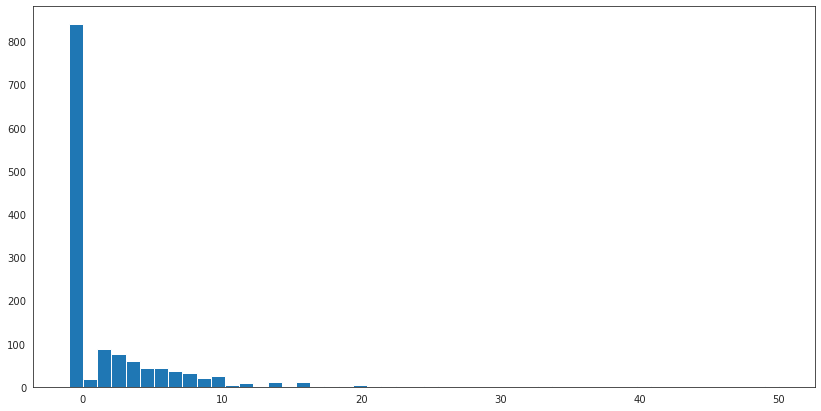

In [352]:
fig,ax = plt.subplots(figsize=(14,7))
plt.hist(tempdfA['Result_cost'],bins=50);

In [354]:
tempdfA['Result_cost'].sum()

1983.9099999999999

In [2]:
tempdfA['Result_cost'].median()

NameError: name 'tempdfA' is not defined

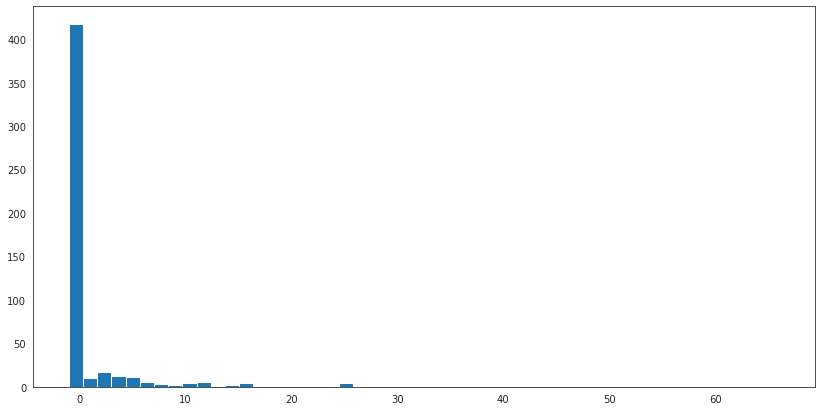

In [355]:
tempdfB = datadf[datadf['Tipster']=='Tipster B']
fig,ax = plt.subplots(figsize=(14,7))
plt.hist(tempdfB['Result_cost'],bins=50);

In [356]:
tempdfB['Result_cost'].sum()

279.66999999999996

In [256]:
tipsterdf = datadf.groupby(['Tipster','Result_cost','Year-Month','Year','Month','TipsterActive']).agg({'Result_cost':['mean','std','min','max']})
tipsterdf = tipsterdf.sort_values(['Year','Month']).reset_index()
tipsterdf

Tipster Result_cost Year-Month  Year Month TipsterActive Result_cost  \
                                                                         mean   
0      Tipster T       -23.0     2013-1  2013     1          True       -23.0   
1      Tipster T       -11.0     2013-1  2013     1          True       -11.0   
2      Tipster T        -9.0     2013-1  2013     1          True        -9.0   
3      Tipster X        -9.0     2013-1  2013     1          True        -9.0   
4      Tipster X        -8.0     2013-1  2013     1          True        -8.0   
...          ...         ...        ...   ...   ...           ...         ...   
17244  Tipster Y        -7.0    2016-12  2016    12         False        -7.0   
17245  Tipster Y        -6.5    2016-12  2016    12         False        -6.5   
17246  Tipster Y        -5.0    2016-12  2016    12         False        -5.0   
17247  Tipster Y        -3.5    2016-12  2016    12         False        -3.5   
17248  Tipster Y         4.5    2016-12  2016    12         False         4.5   

                        
       std   min   max  
0      NaN -23.0 -23.0  
1      NaN -11.0 -11.0  
2      NaN  -9.0  -9.0  
3      0.0  -9.0  -9.0  
4      NaN  -8.0  -8.0  
...    ...   ...   ...  
17244  0.0  -7.0  -7.0  
17245  NaN  -6.5  -6.5  
17246  NaN  -5.0  -5.0  
17247  NaN  -3.5  -3.5  
17248  NaN   4.5   4.5  

[17249 rows x 10 columns]

In [257]:
tipsterdf.describe()

Result_cost          Year         Month   Result_cost          \
                                                         mean     std   
count  17249.000000  17249.000000  17249.000000  17249.000000  7714.0   
mean      -6.415171   2015.233463      6.392892     -6.415171     0.0   
std       16.998045      0.733541      3.385316     16.998045     0.0   
min     -407.000000   2013.000000      1.000000   -407.000000     0.0   
25%      -11.000000   2015.000000      3.000000    -11.000000     0.0   
50%       -5.500000   2015.000000      6.000000     -5.500000     0.0   
75%        3.250000   2016.000000      9.000000      3.250000     0.0   
max      101.000000   2016.000000     12.000000    101.000000     0.0   

                                   
                min           max  
count  17249.000000  17249.000000  
mean      -6.415171     -6.415171  
std       16.998045     16.998045  
min     -407.000000   -407.000000  
25%      -11.000000    -11.000000  
50%       -5.500000     -5.500000  
75%        3.250000      3.250000  
max      101.000000    101.000000

In [336]:
tipA=tipsterdf[(tipsterdf['Tipster']=='Tipster A')]
tipA.shape

(740, 10)

In [ ]:
#plot Tipster's performance

In [334]:
datatoplot=tipA[tipA['Year']==2018][['Month','TipsterActive','Result_cost']]
datatoplot['mean']=datatoplot['Result_cost']['mean'].to_list()
datatoplot=datatoplot.drop('Result_cost',axis=1)
datatoplot['TipsterActive'].nunique()

0

In [327]:
datatoplot.groupby('Month').mean()['mean']

/home/zy/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Month
1    -4.237500
2    -2.500000
3     0.375000
4    -3.045385
5    -2.064444
6    -1.116667
7    -2.915882
8    -1.859643
9    -0.723529
10   -2.209744
11   -1.455778
12   -1.003421
Name: mean, dtype: float64

AttributeError: 'Figure' object has no attribute 'plot'

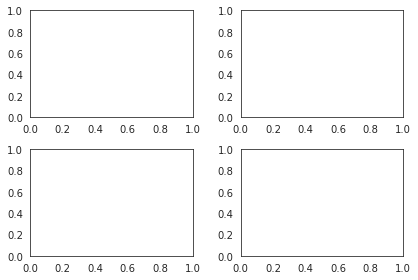

In [285]:
def plotTipYears(year):
    
    datatoplot=tipA[tipA['Year']==year][['Month','TipsterActive','Result_cost']]
    datatoplot['mean']=datatoplot['Result_cost']['mean'].to_list()
    datatoplot=datatoplot.drop('Result_cost',axis=1)
    datatoplot
    
    
    
    
    
    
fig,axs=plt.subplots(2,2)
fig.tight_layout()
fig.plot[tipA]

# cols_to_plot = ['age', 'drinking', 'exercise', 'smoking']

# fig, axs = plt.subplots(nrows=2, ncols=2)
# fig.set_size_inches(20, 10)
# fig.subplots_adjust(wspace=0.2)
# fig.subplots_adjust(hspace=0.5)

# for col, ax in zip(cols_to_plot, axs.flatten()):
#     dftemp = df[col].value_counts()
#     ax.bar(dftemp.index, list(dftemp))
#     ax.set_title(col)
#     ax.tick_params(axis='x', labelrotation=30)